In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import upsetplot
import os
import matplotlib.pyplot as plt
import yaml
from snakemake.io import expand
import pyranges as pr
from pyfaidx import Fasta
from mizani.formatters import percent_format
from scipy import stats


p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

from plotnine import *

In [2]:
def my_theme(base_size=11, w=4, h=3):
    """
    Custom plotnine theme with:
    - White background
    - Clean styling
    - Axes and ticks retained

    Parameters:
    - base_size: Base font size

    Returns:
    - plotnine.theme object
    """
    return (
        theme_minimal(base_size=base_size)
        + theme(
            # White background
            panel_background=element_rect(fill='white', color=None),
            plot_background=element_rect(fill='white', color=None),

            # Remove grid lines
            panel_grid_major=element_blank(),
            panel_grid_minor=element_blank(),
            panel_border=element_blank(),

            # Keep axis lines & ticks (don't blank them)
            axis_line=element_line(color='black'),
            axis_ticks=element_line(color='black'),

            plot_title=element_text(hjust=0.5, family='Helvetica'),
            axis_title_x=element_text(hjust=0.5, family='Helvetica'),
            axis_title_y=element_text(hjust=0.5, margin={'t':0, 'r':-2, 'b':0, 'l':0}, family='Helvetica'),
            
            # Styling text
            legend_title=element_blank(),
            axis_title=element_text(size=base_size + 1, family='Helvetica'),
            legend_text=element_text(size=base_size-2, family='Helvetica'),
            axis_text=element_text(size=base_size, color='black', family='Helvetica'),
            strip_text_x=element_text(size=base_size-1),
            strip_text_y=element_text(size=base_size-1),
            figure_size=(w, h),  # Controls plot dimensions (width x height in inches)
            plot_margin=0.05      # Shrinks surrounding white space
        )
    )

In [3]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

In [4]:
# different gtfs to look at
gc_gtf = proc_cfg(config['ref']['gtf'], od)
poder_gtf = proc_cfg(config['lr']['gtf_filt_with_genes'], od)
enh_gc_gtf = proc_cfg(config['lr']['gtf_gc_poder'], od)



In [5]:
annots = ['GENCODE', 'PODER', 'Enhanced\nGENCODE']
gtfs = [gc_gtf, poder_gtf, enh_gc_gtf]

n_t = []
for annot, gtf in zip(annots, gtfs):
    df = pr.read_gtf(gtf).df
    n_t.append(len(df.loc[df.Feature=='transcript'].transcript_id.unique()))


In [6]:
n_t

[387944, 155875, 429241]

In [7]:
df = pd.DataFrame()
df['annot'] = annots
df['n_t'] = n_t
df.head()

,annot,n_t
0,GENCODE,387944
1,PODER,155875
2,Enhanced\nGENCODE,429241


In [14]:
155875/387944

0.40179768213969025

In [9]:
c_dict, order = get_annot_colors(list(df.annot.unique()))


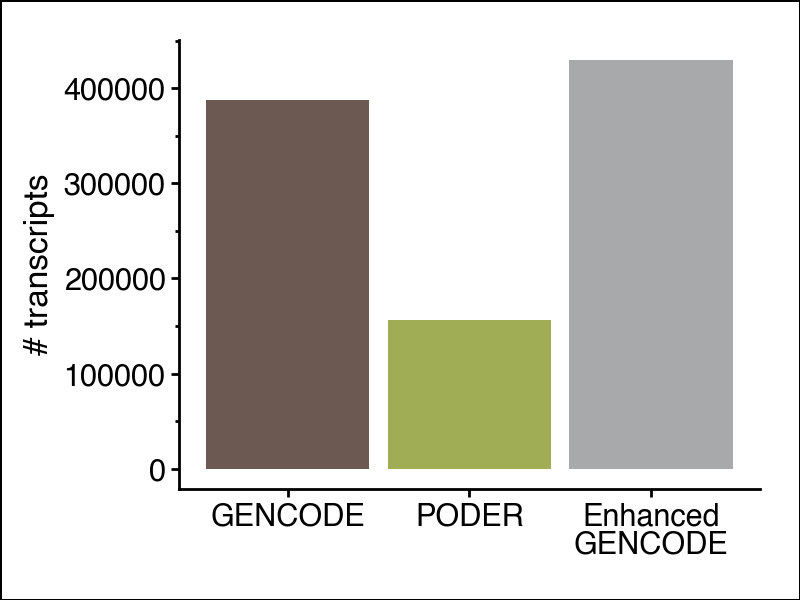

/Users/fairliereese/miniconda3/envs/plotnine_test/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 4 x 3 in image.
/Users/fairliereese/miniconda3/envs/plotnine_test/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: n_t_per_annotation.pdf


In [13]:
df['annot'] = pd.Categorical(df['annot'], categories=order, ordered=True)

p = (ggplot(df, aes(x='annot', y='n_t', fill='annot'))
    + geom_bar(stat='identity')
    + scale_fill_manual(values=c_dict)
    + my_theme(w=4, h=3)
    + labs(y='# transcripts',
          x='')
    + theme(legend_position='none')
 
)
p.show()
p.save('n_t_per_annotation.pdf', width=4, height=3, dpi=500)
